In [71]:
from sklearn.metrics import make_scorer

from sklearn.datasets import fetch_olivetti_faces

from sklearn.utils.validation import check_random_state

from sklearn.linear_model import RidgeCV

import numpy as np
import matplotlib.pyplot as plt

The **make_scorer** function takes two arguments: 
- the function you want to transform
- a parameter about whether you want to maximize the score (like accuracy and R2) or minimize it (like MSE or MAE). 

In the standard implementation, it is assumed that a higher score is better, which is why we see the functions we want to minimize appear differently. We set the parameter `greater_is_better` equal to False

In [72]:
def my_abs_error_func(y_true, y_predict):
    return np.abs(np.array(y_true)-np.array(y_predict)).mean()

mean_abs_scorer = make_scorer(my_abs_error_func, greater_is_better=False)

Load the data

In [73]:
data = fetch_olivetti_faces()
targets = data.target

In [74]:
data = data.images.reshape((len(data.images), -1))
train = data[targets < 30]
test = data[targets >= 30]  # Test on independent people

In [75]:
# selecting a number (n) faces from the test set
n_faces = 5
rng = check_random_state(100)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]

#each face has 64 x 64 pixels
n_pixels = data.shape[1]
X_train = train[:, :int(np.ceil(0.5 * n_pixels))]  # Upper half of the faces
y_train = train[:, int(np.floor(0.5 * n_pixels)):]  # Lower half of the faces
X_test = test[:, :int(np.ceil(0.5 * n_pixels))]
y_test = test[:, int(np.floor(0.5 * n_pixels)):]

In [76]:
alphas = np.arange(1,10)
my_ridgecv = RidgeCV(alphas=alphas)
my_ridgecv.fit(X_train,y_train)
y_test_predict = my_ridgecv.predict(X_test)
print(f'Ridge Score :{my_ridgecv.best_score_} Best Alpha : {my_ridgecv.alpha_}')

Ridge Score :-0.008825308472080943 Best Alpha : 6


In [77]:
my_ridgecv_custom = RidgeCV(scoring=mean_abs_scorer,alphas=alphas)
my_ridgecv_custom.fit(X_train,y_train)
y_test_predict_custom = my_ridgecv_custom.predict(X_test)
print(f'Ridge Score :{my_ridgecv_custom.best_score_} Best Alpha : {my_ridgecv_custom.alpha_}')

Ridge Score :0.07163653279660752 Best Alpha : 1


In [78]:
image_shape = (64, 64)

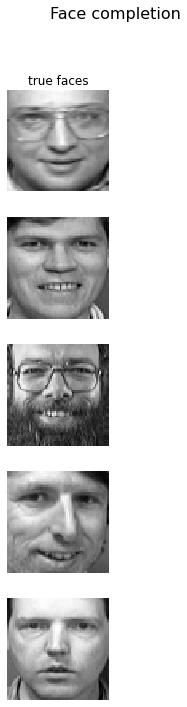

In [79]:
plt.figure(figsize=(4, 2.26 * n_faces))
plt.suptitle("Face completion", size=16)
for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, 2, i * 2 + 1)
    else:
        sub = plt.subplot(n_faces, 2, i * 2 + 1,
                          title="true faces")
        
    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape),
               cmap=plt.cm.gray,interpolation="nearest")

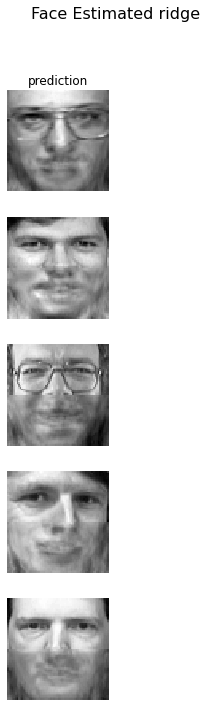

In [80]:
plt.figure(figsize=(4, 2.26 * n_faces))
plt.suptitle("Face Estimated ridge", size=16)
for i in range(n_faces):
    completed_face = np.hstack((X_test[i], y_test_predict[i]))
    if i:
        sub = plt.subplot(n_faces, 2, i * 2 + 1)

    else:
        sub = plt.subplot(n_faces, 2, i * 2 + 1,title='prediction')
    
    sub.axis("off")
    sub.imshow(completed_face.reshape(image_shape),
               cmap=plt.cm.gray,interpolation="nearest")
        


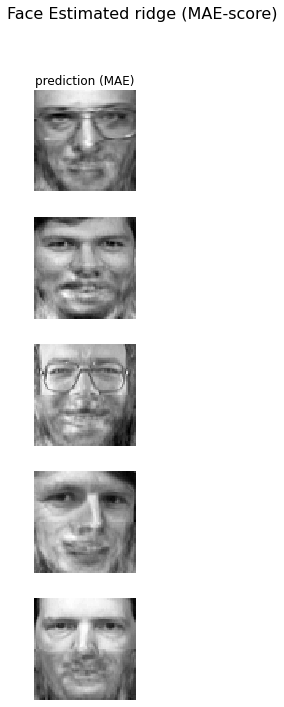

In [81]:
plt.figure(figsize=(4, 2.26 * n_faces))
plt.suptitle("Face Estimated ridge (MAE-score)", size=16)
for i in range(n_faces):
    completed_face = np.hstack((X_test[i], y_test_predict_custom[i]))
    if i:
        sub = plt.subplot(n_faces, 2, i * 2 + 1)

    else:
        sub = plt.subplot(n_faces, 2, i * 2 + 1,title='prediction (MAE)')
    
    sub.axis("off")
    sub.imshow(completed_face.reshape(image_shape),
               cmap=plt.cm.gray,interpolation="nearest")
        